# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Input
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Flatten
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

### **LOAD THE DATA**

In [2]:
# Load the Excel File
df = pd.read_excel("totalfinalenergy_mu.xlsx")

In [3]:
# Printing the first five Rows
df.head()

Year  Forecast
0  2009-01   534.190
1  2009-02   641.028
2  2009-03   747.866
3  2009-04   854.704
4  2009-05  1068.380

In [4]:
# Changing the Year column data type from object to Date Time
df['Year']= pd.to_datetime(df['Year'])

In [5]:
# Setting the Year Column as Index
df.set_index("Year", inplace = True)

In [6]:
# Shape of Dataset
df.shape

(132, 1)

In [7]:
# Plotting the forecast column
df1=df[['Forecast']]

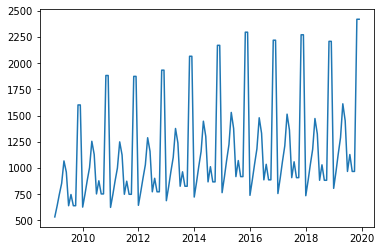

In [8]:
# Plotting the Forecast Column
plt.plot(df1)

In [9]:
# Scaline the Forecast Column values from 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
# Reshaping the Data
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.6)
# Test Size
test_size=len(df1)-training_size
# Train data and Test Data
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
# Size of Training Data and Test Data
training_size,test_size


(79, 53)

In [12]:
# convert an array of values into a dataset matrix
def traintestdataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# Considering the previous 40 time steps
time_step = 40
# Creating an Training Data and Testing Data
X_train, y_train = traintestdataset(train_data, time_step)
X_test, ytest = traintestdataset(test_data, time_step)


In [14]:
ytest

array([0.88830506, 0.1445099 , 0.23005891, 0.31560792, 0.40115693,
       0.57225495, 0.48670594, 0.23005891, 0.31560792, 0.23005891,
       0.23005891, 1.        ])

In [15]:
# Training Size of Independent and Dependent Columns
print(X_train.shape), print(y_train.shape)


(38, 40)
(38,)


(None, None)

In [16]:
# Testing Size of Independent and Dependent Columns
print(X_test.shape), print(ytest.shape)


(12, 40)
(12,)


(None, None)

In [17]:
# Reshaping the Trainbing Dataset
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# Reshaping the Testing Dataset
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer= 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 100)               57700     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 57,993
Trainable params: 57,993
Non-trainable params: 0
____________________________________________________

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 100)               57700     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 57,993
Trainable params: 57,993
Non-trainable params: 0
____________________________________________________

In [20]:
# Training the Model with 100 epochs and batch size of 64 and Testing the model on test dataset and evaluating the Valdidation Loss
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.1425 - val_loss: 0.1033
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0781 - val_loss: 0.0763
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0589 - val_loss: 0.0830
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0628 - val_loss: 0.0844
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0632 - val_loss: 0.0722
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0547 - val_loss: 0.0566
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0437 - val_loss: 0.0443
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0350 - val_loss: 0.0383
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0306 - val_loss: 0.0372
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0295 - val_loss: 0.0378
Epoch 11/100
1/1 [===

In [21]:
# Train and Test Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
# Accurracy Score
r2_score(ytest, test_predict)

0.9790236091995895

In [23]:
# Calculating the Mean Sqaured Error for the Training Set
math.sqrt(mean_squared_error(y_train,train_predict))

0.008169268250901364

In [24]:
# Calculating the Mean Sqaured Error for the Test Set
math.sqrt(mean_squared_error(ytest,test_predict))


0.037991338535637575

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_train,train_predict))
print(mean_absolute_error(ytest,test_predict))


0.0066006948264511495
0.014227991584399524


In [26]:
# Transforming the Data into the Orignal Form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

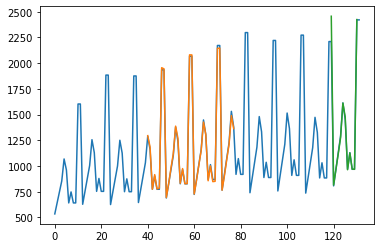

In [27]:
# look back to 40
look_back=40
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Doing predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)


53

In [29]:
# Setting the Input Shape
x_input=test_data[13:].reshape(1,-1)
x_input.shape

(1, 40)

In [30]:
# Crating an List
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.18765237032284748,
 0.18765237032284748,
 0.8939836587965198,
 0.8939836587965198,
 0.11831200988319385,
 0.19862144292508604,
 0.27893087596697835,
 0.35924030900887055,
 0.5198591750926551,
 0.43954974205076275,
 0.19862144292508604,
 0.27893087596697835,
 0.19862144292508604,
 0.19862144292508604,
 0.9214063403021162,
 0.9214063403021162,
 0.1072782511412862,
 0.18538093243479692,
 0.2634836137283077,
 0.3415862950218184,
 0.49779165760883975,
 0.41968897631532903,
 0.18538093243479692,
 0.2634836137283077,
 0.18538093243479692,
 0.18538093243479692,
 0.8883050640763934,
 0.8883050640763934,
 0.14450989644915513,
 0.23005890680423963,
 0.3156079171593242,
 0.4011569275144086,
 0.5722549482245776,
 0.48670593786949307,
 0.23005890680423963,
 0.3156079171593242,
 0.23005890680423963,
 0.23005890680423963,
 1.0,
 1.0]

In [32]:
# Doing Predictions for the Next 30 Months
from numpy import array

lst_output=[]
n_steps=40
i=0
while(i<30):
    
    if(len(temp_input)>40):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16296272]
41
1 Month input [0.18765237 0.89398366 0.89398366 0.11831201 0.19862144 0.27893088
 0.35924031 0.51985918 0.43954974 0.19862144 0.27893088 0.19862144
 0.19862144 0.92140634 0.92140634 0.10727825 0.18538093 0.26348361
 0.3415863  0.49779166 0.41968898 0.18538093 0.26348361 0.18538093
 0.18538093 0.88830506 0.88830506 0.1445099  0.23005891 0.31560792
 0.40115693 0.57225495 0.48670594 0.23005891 0.31560792 0.23005891
 0.23005891 1.         1.         0.16296272]
1 Month output [[0.2420547]]
2 Month input [0.89398366 0.89398366 0.11831201 0.19862144 0.27893088 0.35924031
 0.51985918 0.43954974 0.19862144 0.27893088 0.19862144 0.19862144
 0.92140634 0.92140634 0.10727825 0.18538093 0.26348361 0.3415863
 0.49779166 0.41968898 0.18538093 0.26348361 0.18538093 0.18538093
 0.88830506 0.88830506 0.1445099  0.23005891 0.31560792 0.40115693
 0.57225495 0.48670594 0.23005891 0.31560792 0.23005891 0.23005891
 1.         1.         0.16296272 0.2420547 ]
2 Month output [[0.32950276]]
3 

In [33]:
day_new=np.arange(1,41)
day_pred=np.arange(41,71)

In [34]:
import matplotlib.pyplot as plt

In [35]:
len(df1)

132

In [36]:
df1

array([[0.        ],
       [0.05664703],
       [0.11329406],
       [0.16994109],
       [0.28323516],
       [0.22658812],
       [0.05664703],
       [0.11329406],
       [0.05664703],
       [0.05664703],
       [0.56647031],
       [0.56647031],
       [0.04967312],
       [0.11625478],
       [0.18283643],
       [0.24941809],
       [0.3825814 ],
       [0.31599975],
       [0.11625478],
       [0.18283643],
       [0.11625478],
       [0.11625478],
       [0.71548968],
       [0.71548968],
       [0.04819117],
       [0.11447644],
       [0.18076171],
       [0.24704697],
       [0.3796175 ],
       [0.31333224],
       [0.11447644],
       [0.18076171],
       [0.11447644],
       [0.11447644],
       [0.71104383],
       [0.71104383],
       [0.05866025],
       [0.12703934],
       [0.19541842],
       [0.2637975 ],
       [0.40055566],
       [0.33217658],
       [0.12703934],
       [0.19541842],
       [0.12703934],
       [0.12703934],
       [0.74245107],
       [0.742

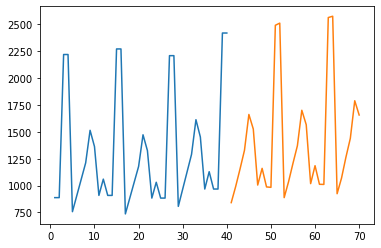

In [37]:
# Prediction Plot for the Next 30 Months, Orange Line show the prediction for the Next 30 Months
plt.plot(day_new,scaler.inverse_transform(df1[92:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [38]:
# Integrating the Orignal Line with the Orignal Line
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[116:])

In [39]:
# Overall Prediction Plot for the Next 30 months
df3=scaler.inverse_transform(df3).tolist()

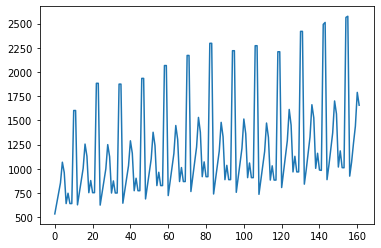

In [40]:
plt.plot(df3)